<a href="https://colab.research.google.com/github/yosuke-515/image-enlarge-and-rotate/blob/main/image_enlarge_and_rotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

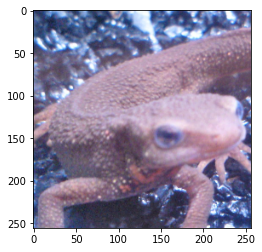

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io
#画像の読み込み
#img_orig = io.imread('https://qiita-image-store.s3.amazonaws.com/0/24213/a26d61fb-6b15-2e74-4a65-f9b3cb246dae.png')#グレースケール画像
img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')#カラー画像
#原画像の表示
plt.imshow(img_orig)
plt.show()

In [ ]:
#最近傍補間の拡大を定義
def Nearest_neighbor_enlarge(original,mag):
  #元となる画像の形状を取得
  row,col,dep=original.shape
  #拡大後のサイズの配列を作成
  img =np.zeros((int(row*mag),int(col*mag),dep),np.uint8)

  for i in range(len(img)):
    for j in range(len(img[i])):
      #最近傍画素値の計算
      x=int(i/mag+0.5)
      y=int(j/mag+0.5)

      #元の画像の外を指定しているときの処理
      if x>row-1:
        x=row-1
      if y>col-1:
        y=col-1

      #画素値を代入
      for k in range(len(img[i][j])):
        img[i][j][k]=original[x][y][k]
  
  return img

In [ ]:
#最近傍補間の回転を定義
def Nearest_neighbor_rotate(original,rad):
  #元となる画像の形状を取得
  row,col,dep=original.shape
  #同じサイズの配列を作成
  img =np.zeros((row,col,dep),np.uint8)

  for i in range(len(original)):
    for j in range(len(original[i])):

      #最近傍画素値の計算
      x=int(row/2+((i-row/2)*math.cos(rad)-(j-col/2)*math.sin(rad))+0.5)
      y=int(col/2+((i-row/2)*math.sin(rad)+(j-col/2)*math.cos(rad))+0.5)

      for k in range(len(img[i][j])):

        #元画像の範囲外は処理スキップ
        if x<0 or y<0:
          continue
        elif row-1<x or col-1<y:
          continue

        #画素値の代入
        else:
          img[i][j][k]=original[x][y][k]

  return img

In [ ]:
#最近傍補間を定義
def Nearest_neighbor(original,mag,theta):
  #角度をラジアンに変換
  rad=math.radians(theta)
  #拡大を実行
  img=Nearest_neighbor_enlarge(original,mag)
  #回転を実行
  img=Nearest_neighbor_rotate(img,rad)
  return img

In [ ]:
#バイリニア補間の拡大を定義
def Bilinear_enlarge(original,mag):
  #元となる画像の形状を取得
  row,col,dep=original.shape
  #拡大後のサイズの配列を作成
  img =np.zeros((int(row*mag),int(col*mag),dep),np.uint8)

  for i in range(len(img)):
    for j in range(len(img[i])):
      #元画像の座標の取得
      x=(i/mag)
      y=(j/mag)

      #元画像の座標の左上の点を取得
      sta_x=int(x)
      sta_y=int(y)

      #元画像の端の場合の処理
      if sta_x>=row-1 and sta_y>=col-1:
        near_x=row-1
        near_y=col-1
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      elif sta_x>=row-1:
        near_x=row-1
        near_y=int(y+0.5)
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      elif sta_y>=col-1:
        near_x=int(x+0.5)
        near_y=col-1
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      #端以外の処理
      else:
        #元画像の座標と左上の点との差を取得
        dist_x=(x-sta_x)
        dist_y=(y-sta_y)
        #画素値の代入
        for k in range(len(img[i][j])):
          #代入する画素値の計算
          num=((1.0-dist_x)*(1.0-dist_y)*original[sta_x][sta_y][k]+dist_x*(1.0-dist_y)*original[sta_x+1][sta_y][k]+(1.0-dist_x)*dist_y*original[sta_x][sta_y+1][k]+dist_x*dist_y*original[sta_x+1][sta_y+1][k])
          img[i][j][k]=int(num+0.5)

  return img

In [ ]:
#バイリニア補間の回転を定義
def Bilinear_rotate(original,rad):
  #元となる画像の形状を取得
  row,col,dep=original.shape
  #同じサイズの配列を作成
  img =np.zeros((row,col,dep),np.uint8)

  for i in range(len(original)):
    for j in range(len(original[i])):
      #元画像の座標の取得
      x=(row/2+((i-row/2)*math.cos(rad)-(j-col/2)*math.sin(rad)))
      y=(col/2+((i-row/2)*math.sin(rad)+(j-col/2)*math.cos(rad)))

      #元画像の座標の左上の点を取得
      sta_x=int(x)
      sta_y=int(y)

      #元画像の端の場合の処理
      if sta_x==row-1 and sta_y==col-1:
        near_x=row-1
        near_y=col-1
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      elif sta_x==row-1:
        near_x=row-1
        near_y=int(y+0.5)
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      elif sta_y==col-1:
        near_x=int(x+0.5)
        near_y=col-1
        for k in range(len(img[i][j])):
          img[i][j][k]=original[near_x][near_y][k]
      #元画像の端より座標が外の場合の処理
      elif sta_x<0 or sta_y<0 or sta_x>row-1 or sta_y>col-1:
        continue
      #端とそれより外をのぞいた処理
      else:
        #元画像の座標と左上の点との差を取得
        dist_x=(x-sta_x)
        dist_y=(y-sta_y)
        #画素値の代入
        for k in range(len(img[i][j])):
          #代入する画素値の計算
          num=((1.0-dist_x)*(1.0-dist_y)*original[sta_x][sta_y][k]+dist_x*(1.0-dist_y)*original[sta_x+1][sta_y][k]+(1.0-dist_x)*dist_y*original[sta_x][sta_y+1][k]+dist_x*dist_y*original[sta_x+1][sta_y+1][k])
          img[i][j][k]=int(num+0.5)
  return img

In [ ]:
#バイリニア補間を定義
def Bilinear(original,mag,theta):
  #角度をラジアンに変換
  rad=math.radians(theta)
  #拡大を実行
  img=Bilinear_enlarge(original,mag)
  #回転を実行
  img=Bilinear_rotate(img,rad)
  return img

In [ ]:
magnification=2.0 #拡大倍率の指定
theta=30  #角度の指定

#最近傍補完の実行
img_n=Nearest_neighbor(img_orig,magnification,theta)
#バイリニア補間の実行
img_b=Bilinear(img_orig,magnification,theta)

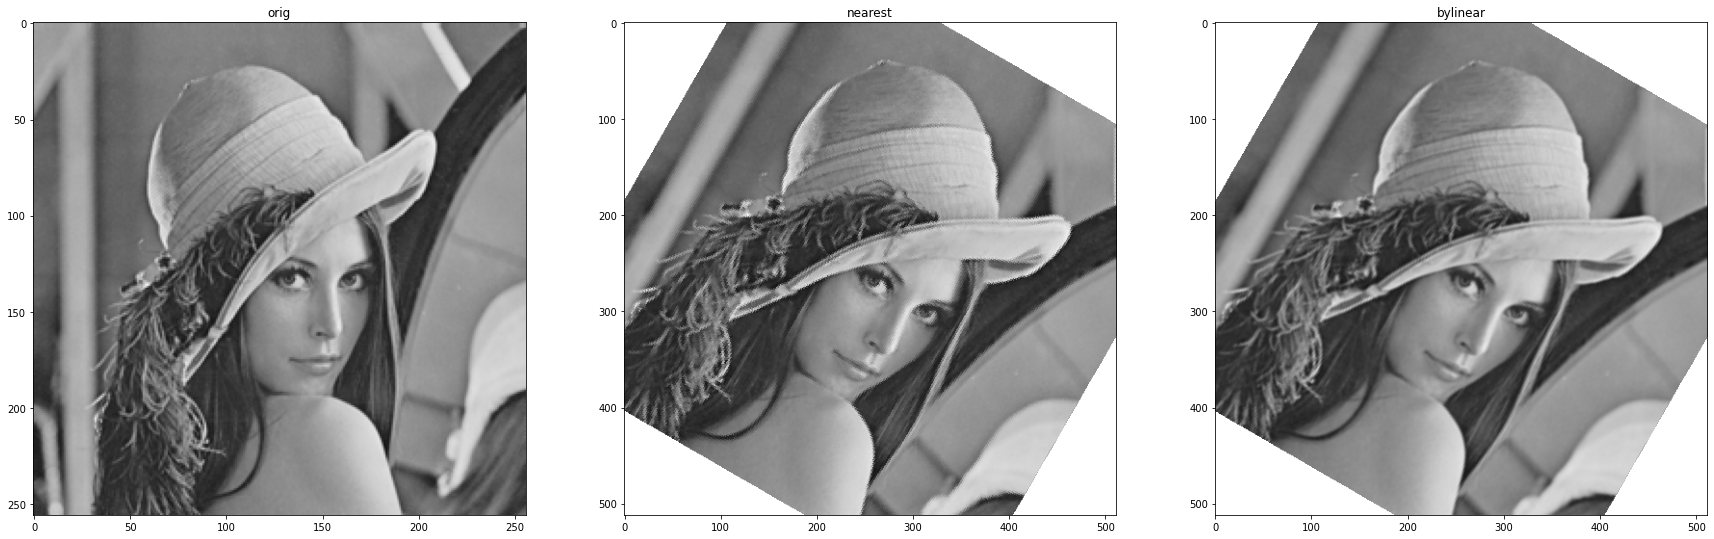

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_n); plt.title('nearest')
plt.subplot(1, 3, 3); plt.imshow(img_b); plt.title('bylinear')
plt.show()

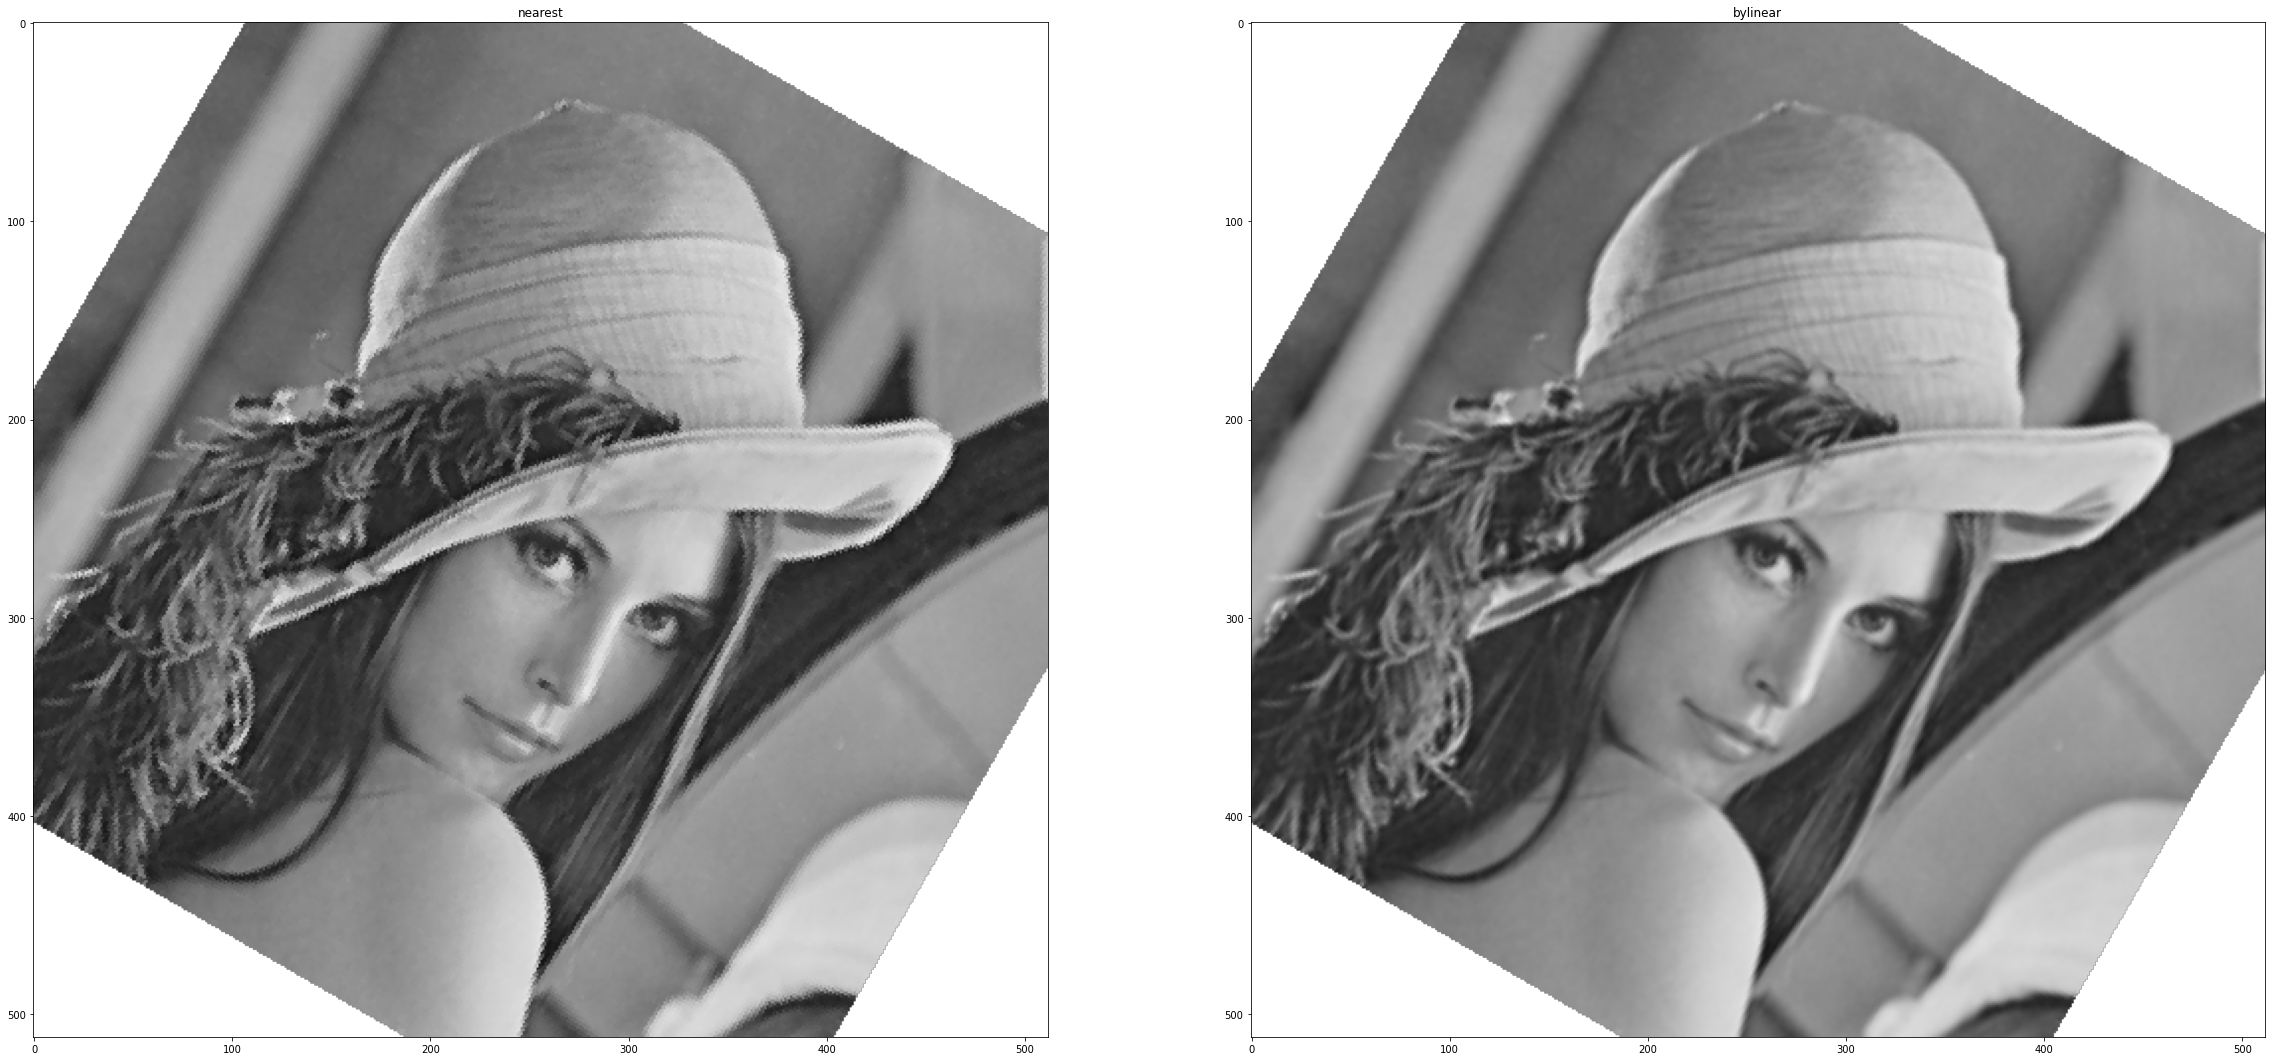

In [ ]:
plt.figure(figsize=(40,40))
plt.subplot(1, 2, 1); plt.imshow(img_n); plt.title('nearest')
plt.subplot(1, 2, 2); plt.imshow(img_b); plt.title('bylinear')
plt.show()